In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter, Animator
from classes.descriptors import ExtremeNeighborCount
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
atom_cols = [Atom_Collection([Atom(position=pos) for pos in poses]) for poses in positions]
neighboring = ExtremeNeighborCount(color="C4")

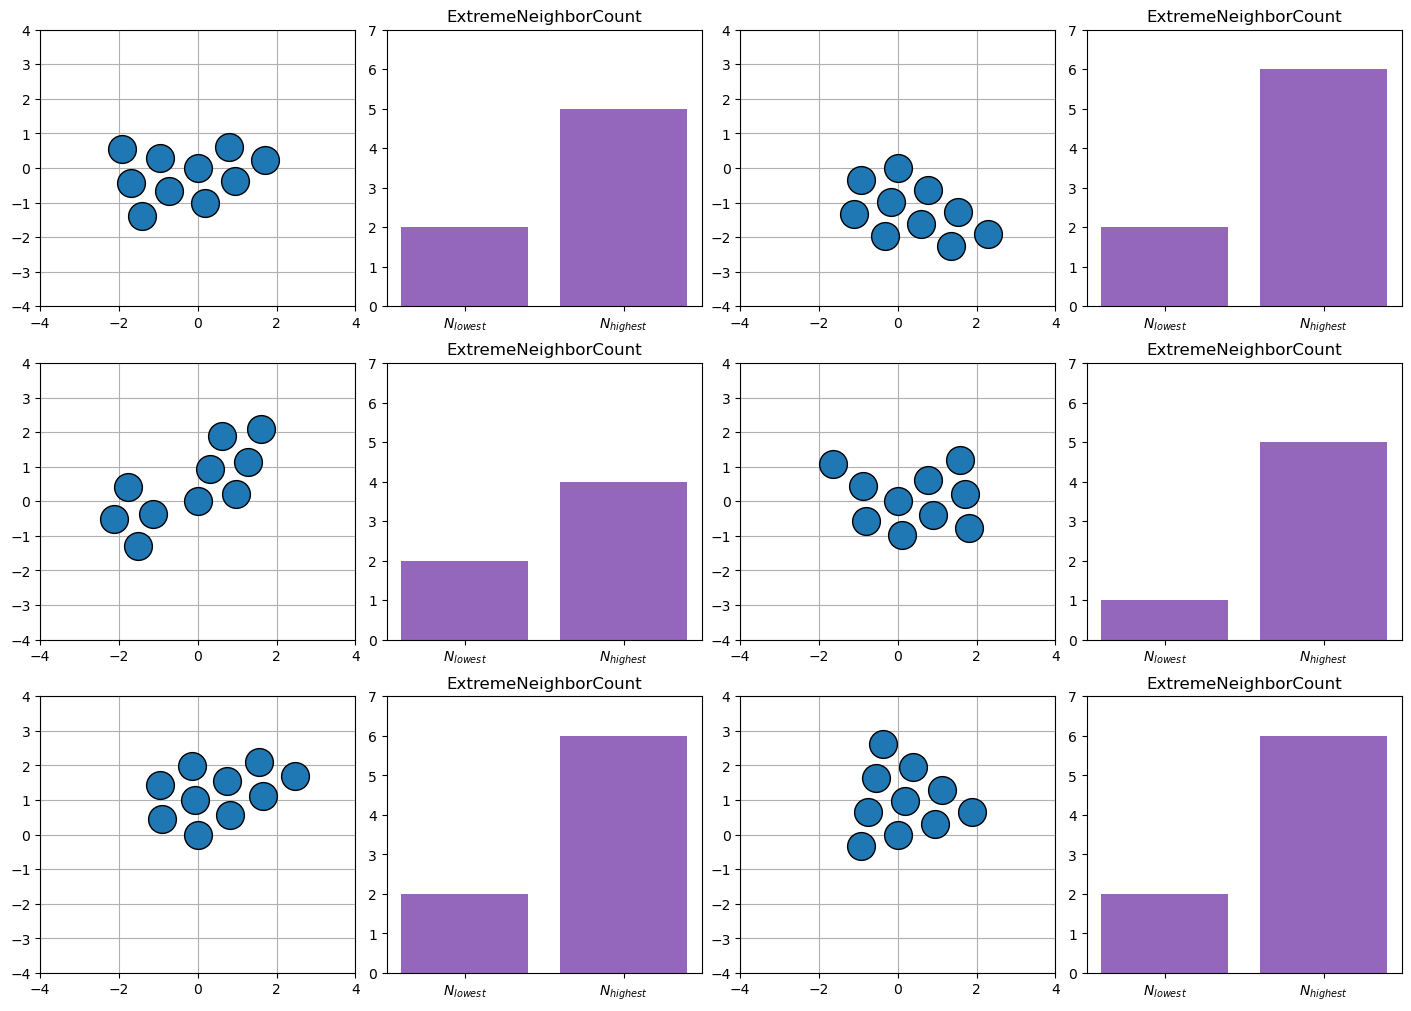

In [4]:
fig, axs = plt.subplots(3,4, figsize=(14,10), layout="constrained")
j = 0
atom_plotter = Atom_Collection_Plotter(markersize=20)
for i in [0, 2]:
    for ax1, ax2 in zip(axs[:,i], axs[:,i+1]):
        ax1.set_xlim([-4,4])
        ax1.set_ylim([-4,4])
        ax1.grid()
        neighboring.plot(atom_col=atom_cols[j], ax=ax2)
        atom_cols[j].reset_plot_axes()
        atom_plotter(atom_cols[j], ax=ax1)
        j+=1

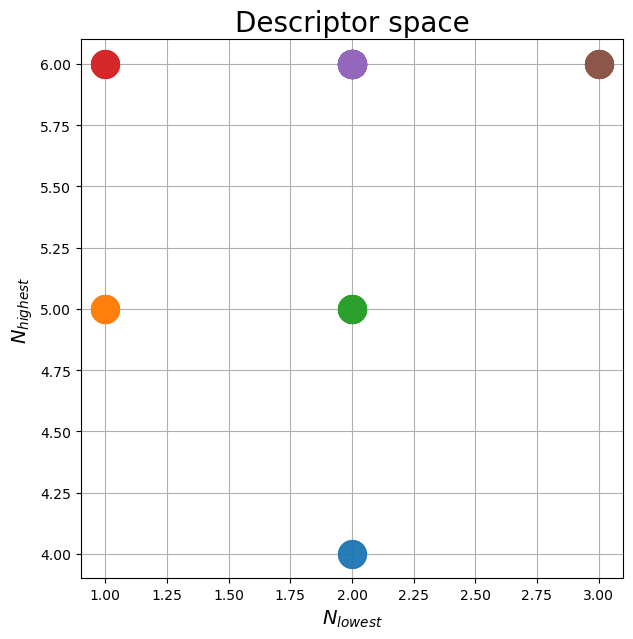

In [21]:
fig, ax = plt.subplots(figsize=(7,7))
ax.grid()
ax.set_xlabel(r"$N_{lowest}$", fontsize=14)
ax.set_ylabel(r"$N_{highest}$", fontsize=14)
ax.set_title("Descriptor space", fontsize=20)
descriptors = np.array([neighboring.get_descriptor(atom_col=atom_col) for atom_col in atom_cols])
desc_ints = [2.0,4.0,5.0,6.0]

descriptors_sorted = {}
atom_cols_sorted = {}
indices_sorted = {}
color_map = {(2,4):"C0", 
                  (1,5):"C1",
                  (2,5):"C2",
                  (1,6):"C3",
                  (2,6):"C4",
                  (3,6):"C5"
                  }
for i in [1,2,3]:
    for j in [4,5,6]:
        descriptors_sorted[(i,j)] = []
        atom_cols_sorted[(i,j)] = []
        indices_sorted[(i,j)] = []

for i, atom_col, descriptor in zip(range(len(descriptors)), atom_cols, descriptors):
    for desc_intx in [1,2,3]:
        for desc_inty in [4,5,6]:
            if descriptor[0] == desc_intx and descriptor[1] == desc_inty:
                descriptors_sorted[(desc_intx, desc_inty)].append(descriptor)
                atom_cols_sorted[(desc_intx, desc_inty)].append(atom_col)
                indices_sorted[(desc_intx, desc_inty)].append(i)

for Npair in descriptors_sorted:
    descs = descriptors_sorted[Npair]
    for desc in descs:
        ax.plot(desc[0], desc[1], "o", c=color_map[Npair], markersize=20, alpha=0.8)
                

In [22]:
class cluster_anim(Animator):
    def __init__(self, default_cols=..., markersize=50, scale_with_mass=False, alpha=1) -> None:
        super().__init__(default_cols, markersize, scale_with_mass, alpha)
    
    def animate(self, ax, atom_col, displacement):
        atom_col.move_atoms(displacement)
        self(atom_col, ax=ax)
        atom_col.move_atoms(-displacement)

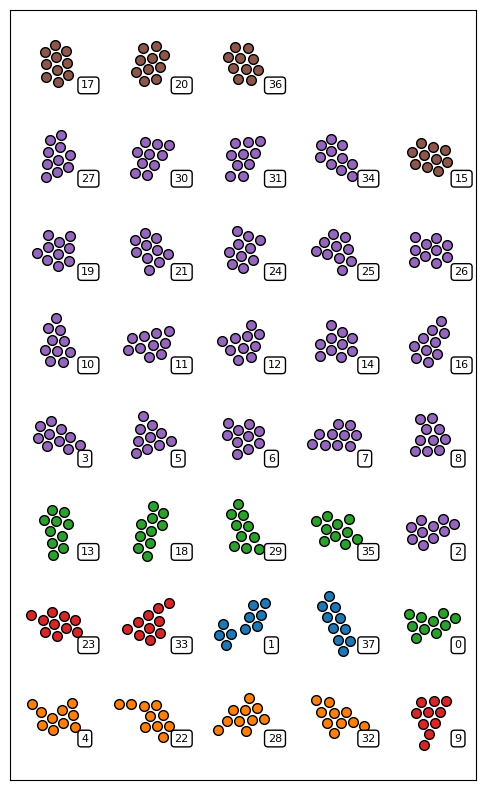

In [28]:
fig, ax = plt.subplots(figsize=(9, 10))
atom_plotters = {Npair: cluster_anim(markersize=7, default_cols=(color_map[Npair], "C1")) for Npair in color_map}

disp_x = 7.5
disp_y = 7.5

i = 0
j = 0

for Npair in atom_cols_sorted:
    if Npair in color_map:
        atom_plotter = atom_plotters[Npair]
        atom_cols_plot = atom_cols_sorted[Npair]
        indices = indices_sorted[Npair]
        for atom_col, index in zip(atom_cols_plot, indices):
            atom_col.reset_plot_axes()
            center_mass = np.mean(atom_col.positions, axis=0)
            disp = np.ones(shape=atom_col.positions.shape)
            disp[:,0]*=i*disp_x
            disp[:,1]*=j*disp_y
            atom_plotter.animate(ax=ax, atom_col=atom_col, displacement=disp-center_mass)
            ax.annotate(text=f"{index}", xy=(i*disp_x+2.0, j*disp_y-2.0), fontsize=8, bbox=dict(boxstyle="round", fc="w"))
            i+=1
            if i == 5:
                i = 0
                j += 1

ax.set_aspect("equal")
s = ax.set_xticks([])
s = ax.set_yticks([])